In [180]:
import numpy as np 
from BaselineRemoval import BaselineRemoval as br
import matplotlib.pyplot as plt

# 方案1 airPLS (直线)

WARING max iteration reached!


(-10.0, 4000.0)

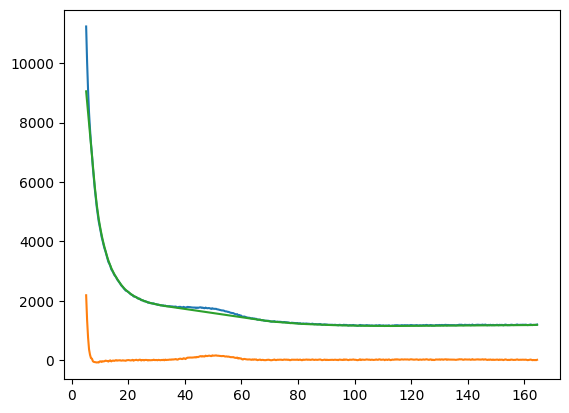

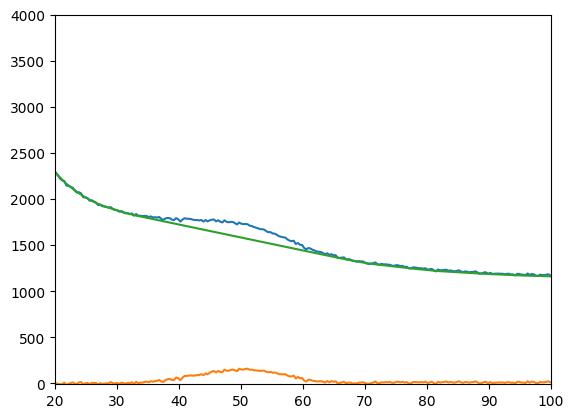

In [193]:
id = 525
id2 = 1000
data = np.loadtxt(r'12--1_4v_01.txt')
obj = br(data[id:id2, -1])
res = obj.ZhangFit(lambda_=6)
plt.figure()
plt.plot(data[id:id2, 0], data[id:id2, -1])

plt.plot(data[id:id2, 0], res)
plt.plot(data[id:id2, 0], data[id:id2, -1] - res)
plt.figure()
plt.plot(data[id:id2, 0], data[id:id2, -1])

plt.plot(data[id:id2, 0], res)
plt.plot(data[id:id2, 0], data[id:id2, -1] - res)
plt.xlim(20, 100)
plt.ylim(-10, 4000)

# 方案2 OCP(已知背景)

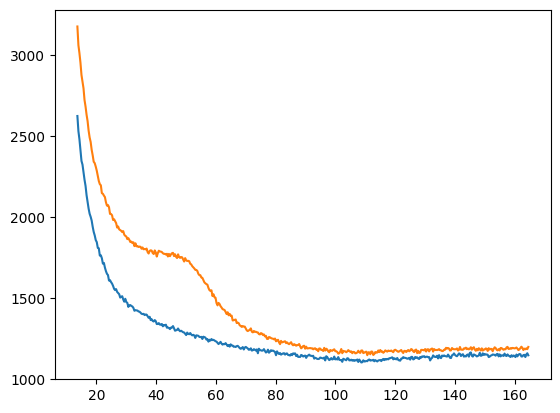

In [194]:
baseline = np.loadtxt(r'1-ocp_02.txt')
id = 550
id2 = 1000
plt.plot(baseline[id:id2, 0], baseline[id:id2, -1])
data = np.loadtxt(r'12--1_4v_01.txt')
plt.plot(data[id:id2, 0], data[id:id2, -1])

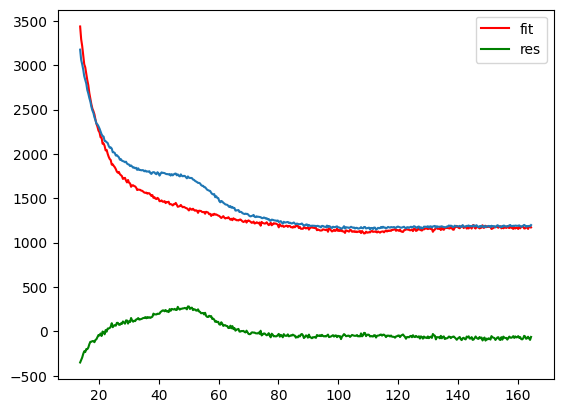

In [196]:
#curve_fit
from scipy.optimize import curve_fit
def func(x, a, b, ):
    return a * x + b 
popt, pcov = curve_fit(func, baseline[id:id2, -1], data[id:id2, -1])
plt.plot(data[id:id2, 0], func(baseline[id:id2, -1], *popt)-90, color='r',label='fit')
plt.plot(data[id:id2, 0], data[id:id2, -1])
plt.plot(data[id:id2, 0], data[id:id2, -1] - func(baseline[id:id2, -1], *popt), color='g', label='res')
plt.legend()

# 方案3 多项式

(-10.0, 4000.0)

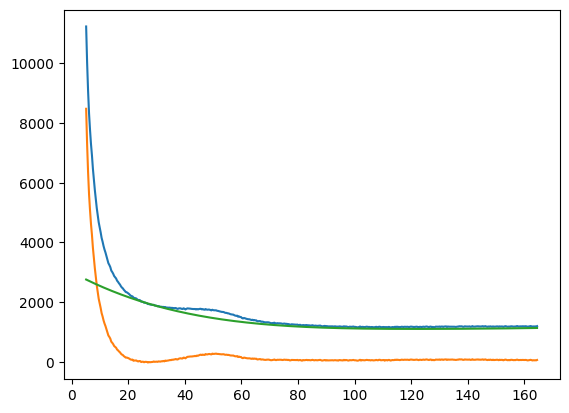

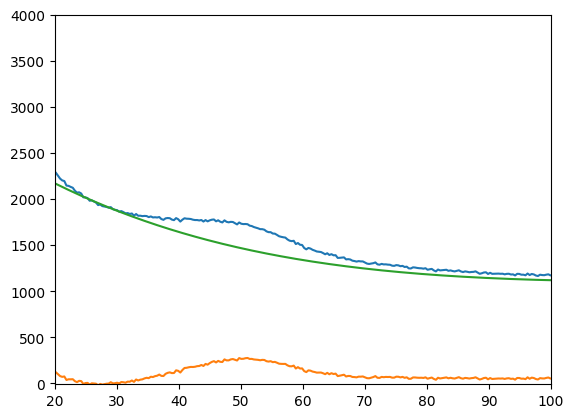

In [215]:
id = 525
id2 = 1000
data = np.loadtxt(r'12--1_4v_01.txt')
obj = br(data[id:id2, -1])
res = obj.IModPoly(4)+65
plt.figure()
plt.plot(data[id:id2, 0], data[id:id2, -1])

plt.plot(data[id:id2, 0], res)
plt.plot(data[id:id2, 0], data[id:id2, -1] - res)
plt.figure()
plt.plot(data[id:id2, 0], data[id:id2, -1])

plt.plot(data[id:id2, 0], res)
plt.plot(data[id:id2, 0], data[id:id2, -1] - res)
plt.xlim(20, 100)
plt.ylim(-10, 4000)

# 方案4 分段函数

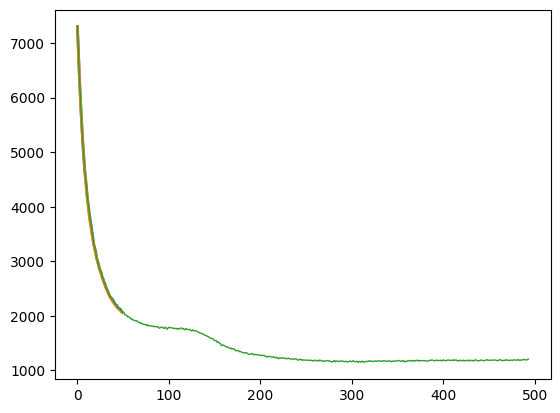

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from BaselineRemoval import BaselineRemoval as br
data = np.loadtxt(r'12--1_4v_01.txt')
id = 530
id2 = 580
obj = br(data[id:id2, -1].tolist())
left = obj.ModPoly(5, gradient=1e-3,)
plt.plot(data[id:id2, -1], linewidth=2)
# plt.plot(left, linewidth=2)
plt.plot(data[id:id2, -1]-left, linewidth=2)

plt.plot(data[id:, -1], linewidth=1)


In [22]:
res.shape

(450,)

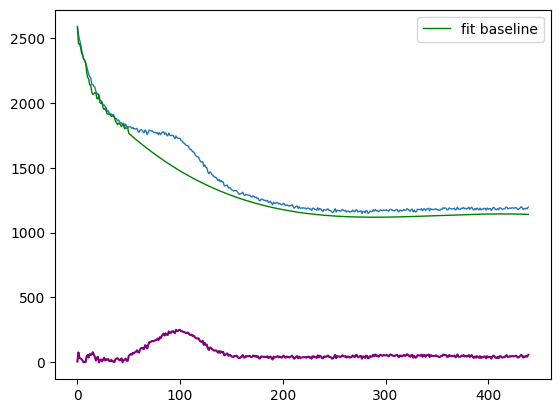

In [73]:

import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt(r'12--1_4v_01.txt')
id = 560
id2 = 1000
obj = br(data[id:id2, -1].tolist())
res = obj.IModPoly(3, gradient=1e-3, repitition=9)+45
res[:50] = left

plt.plot(data[id:id2, -1], linewidth=1)
# plt.plot(res, linewidth=2)
plt.plot(data[id:id2, -1]-res, linewidth=1, color='green', label='fit baseline')

plt.plot(res, color='purple')
plt.legend()

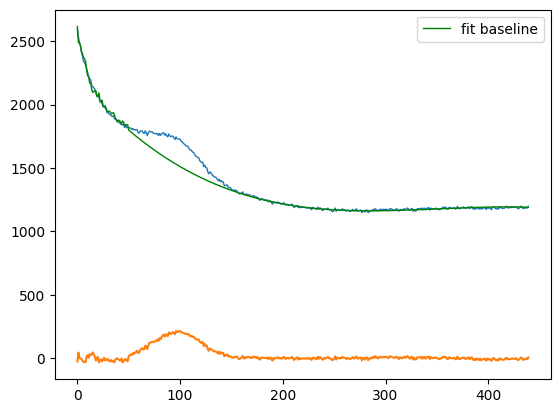

In [74]:
obj = br(res.tolist())
res2 = obj.IModPoly(1, gradient=1e-3, repitition=9)
plt.plot(data[id:id2, -1], linewidth=1)
# plt.plot(res, linewidth=2)
plt.plot(data[id:id2, -1]-res2, linewidth=1, color='green', label='fit baseline')

# plt.plot(res)
plt.plot(res2)
plt.legend()

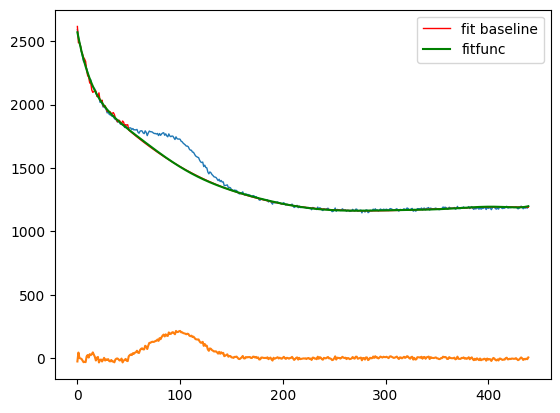

In [75]:
# polyfit
target = data[id:id2, -1]-res2
func = np.polyfit(np.arange(len(target)), target, 10)
res_func = np.polyval(func, np.arange(len(target)))

plt.plot(data[id:id2, -1], linewidth=1)
plt.plot(data[id:id2, -1]-res2, linewidth=1, color='red', label='fit baseline')

plt.plot(np.arange(len(target)), res_func, color='green', label='fitfunc')
plt.plot(res2)
plt.legend()

In [72]:
func

array([ 1.44070837e-20, -3.39088187e-17,  3.44326754e-14, -1.97443185e-11,
        7.02712726e-09, -1.60690528e-06,  2.36298437e-04, -2.17643447e-02,
        1.20296777e+00, -4.24527966e+01,  2.56856757e+03])

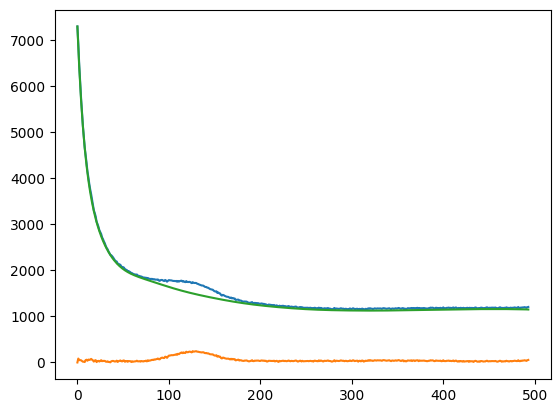

In [110]:
def ModPoly(x, order_, gradient=1e-3, repitition=9):
    obj = br(x)
    res = obj.ModPoly(order_, gradient=gradient, repitition=repitition)
    res = res - res.min()
    return res

def IModPoly(x, order_, gradient=1e-3, repitition=9):
    obj = br(x)
    res = obj.IModPoly(order_, gradient=gradient, repitition=repitition)
    res = res - res.min()
    return res 

def debaseline4ulf(x, breakpoint1, breakpoint2, order1, order2, order3):
    left = ModPoly(x[:breakpoint1], order1, gradient=1e-3, repitition=9)
    left -= left.min()
    right = IModPoly(x[breakpoint2:], order2, gradient=1e-3, repitition=9)
    right = right[breakpoint1-breakpoint2:]
    # right -= right.min()

    left_baseline = x[:breakpoint1]- left
    right_baseline = x[breakpoint1:]- right
    dif = left_baseline[-1]-right_baseline[0]
    right -= dif

    tmp = np.concatenate((left, right))
    target_baseline = (x - tmp)[:]
    func = np.polyfit(np.arange(len(target_baseline)), target_baseline, order3)
    target_baseline = np.polyval(func, np.arange(len(target_baseline)))
    obj_baseline = x - tmp
    obj_baseline[:] = target_baseline
    tmp = x - obj_baseline
    tmp = IModPoly(tmp, 1)
    tmp = tmp - tmp.min()
    return tmp

from BaselineRemoval import BaselineRemoval as br
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt(r'12--1_4v_01.txt')
data = data[530:]
r = debaseline4ulf(data[:, -1], 55, 30, 5, 3, 21)
plt.plot(data[:, -1])
plt.plot(r)
plt.plot(data[:, -1]-r)

--------------------------------------------------------

# others

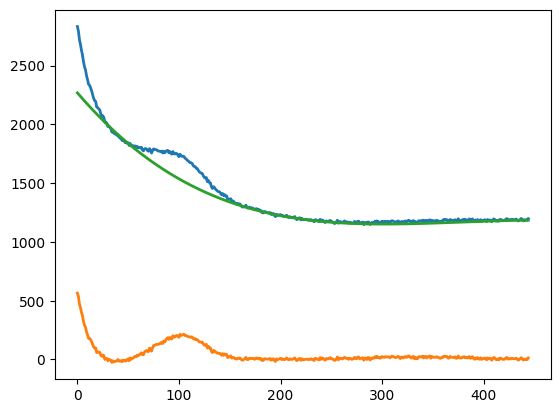

In [63]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt(r'12--1_4v_01.txt')
id = 555
id2 = 1000
obj = br(data[id:id2, -1].tolist())
res = obj.ModPoly(4, gradient=1e-3, repitition=8)
plt.plot(data[id:id2, -1], linewidth=2)
plt.plot(res, linewidth=2)
plt.plot(data[id:id2, -1]-res, linewidth=2)



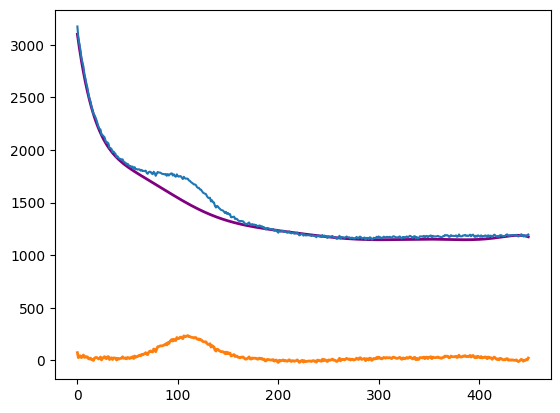

In [127]:
demo = data[id:id2, -1]-res

# use polyfit to fit demo
func = np.polyfit(np.arange(len(demo)), demo, 9)
# plt.plot(demo)
plt.plot(np.polyval(func, np.arange(len(demo))), color='purple', linewidth=2)

plt.plot(data[id:id2, -1])
plt.plot(data[id:id2, -1]-np.polyval(func, np.arange(len(demo))), linewidth=2)


In [ ]:

import matplotlib.pyplot as plt
data = data[525:]

plt.figure()
plt.plot(data[:, 0], data[:, -1])
start_id = 30
end_id = 250
plt.plot(data[:start_id, 0], data[:start_id, -1])
plt.plot(data[end_id:, 0], data[end_id:, -1])


In [220]:
new_data = np.r_[data[:start_id, -1], data[end_id:, -1]]

In [221]:
new_data = data[:, -1].copy()

In [222]:
left = data[:start_id, -1].copy()
right = data[end_id:, -1].copy()

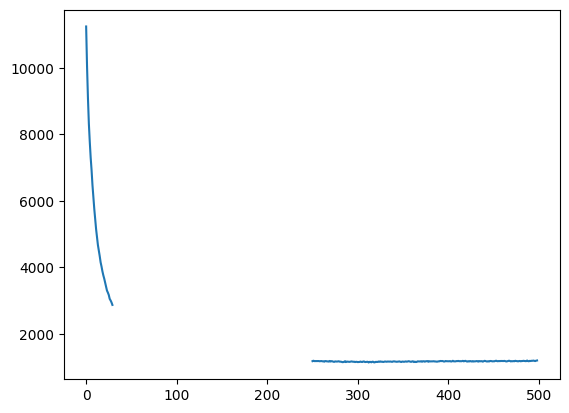

In [223]:
new_data[start_id:end_id] = np.nan
plt.plot(new_data)

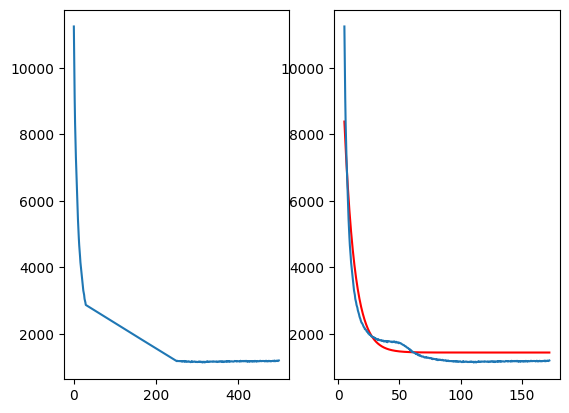

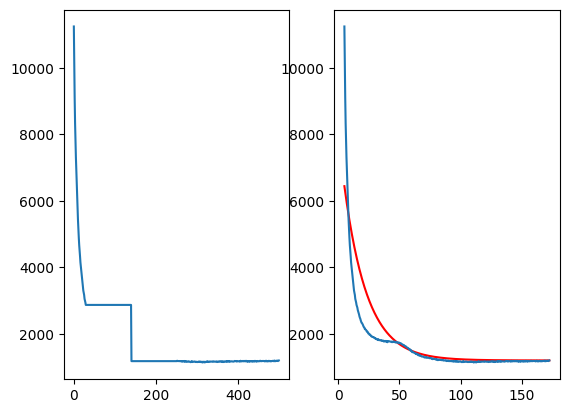

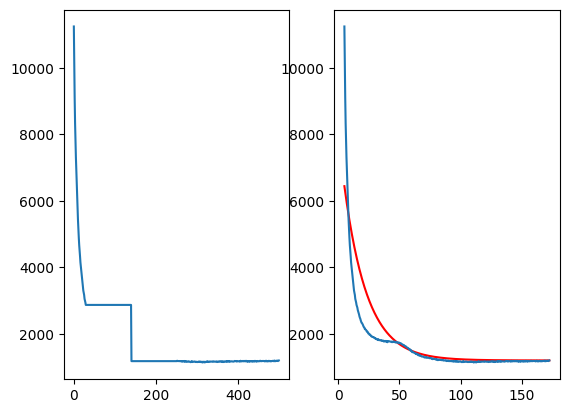

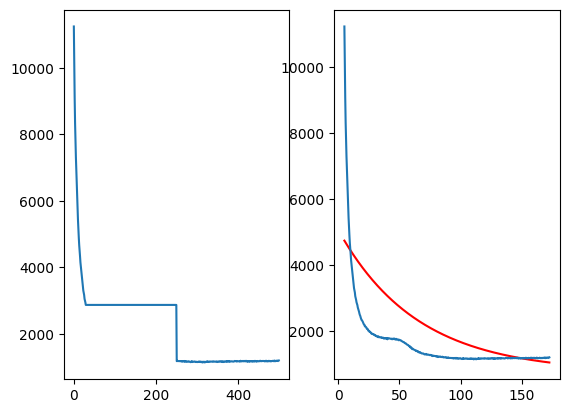

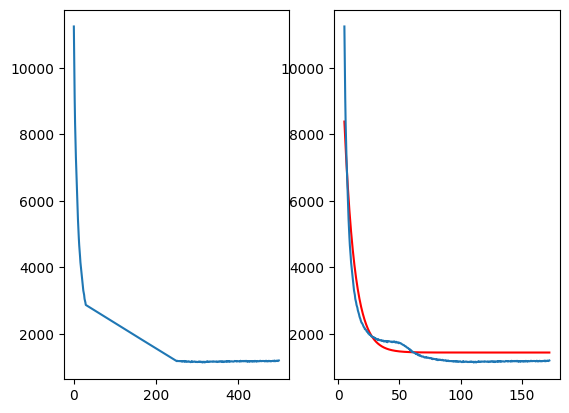

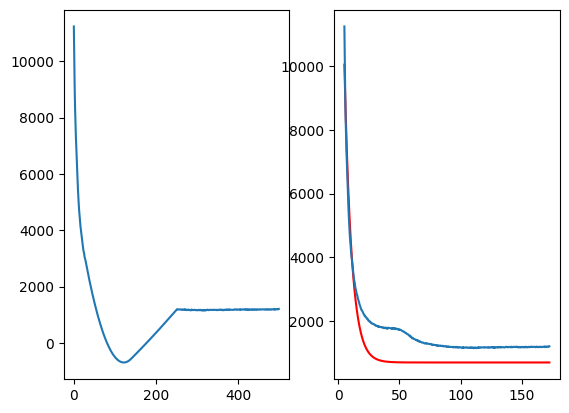

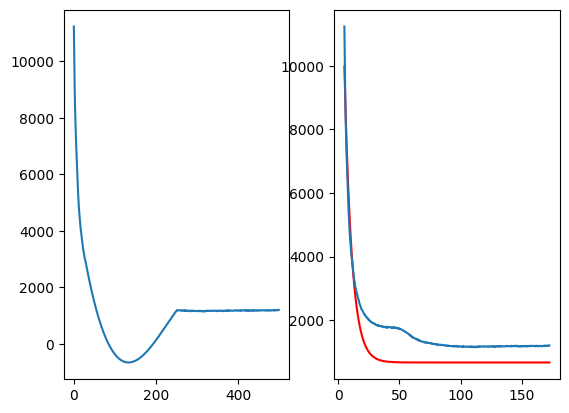

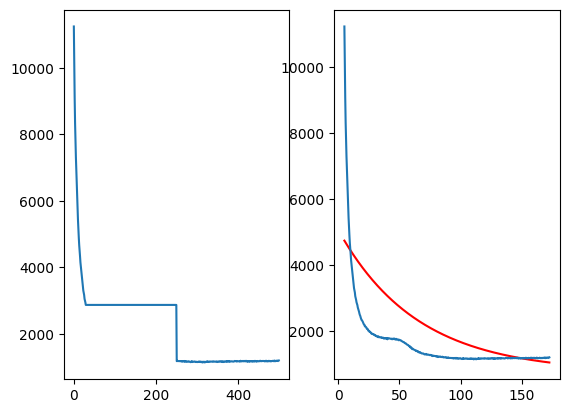

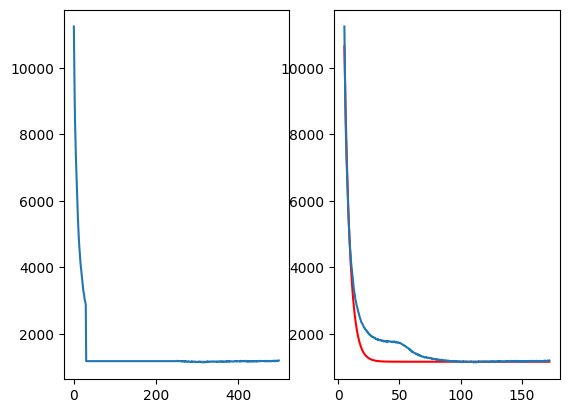

In [224]:
from scipy.interpolate import interp1d
# Create a mask to identify NaN values
nan_mask = np.isnan(new_data)
res = new_data.copy()
for k in ['linear', 'nearest', 'nearest-up', 'zero', 'slinear', 'quadratic', 'cubic', 'previous', 'next']:
# Replace NaN values with linearly interpolated values for smoother fitting
    plt.figure()
    func = interp1d(data[~nan_mask, 0], new_data[~nan_mask], kind=k)
    res[nan_mask] = func(data[nan_mask, 0])
    plt.subplot(121)
    plt.plot(res)
    plt.subplot(122)
    #curve_fit
    from scipy.optimize import curve_fit
    def func(x, a, b, c, ):
        return a * np.exp(-b * x) + c 
    popt, pcov = curve_fit(func, data[:, 0], res)
    plt.plot(data[:, 0], func(data[:, 0], *popt), 'r-',
            label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    plt.plot(data[:, 0], data[:, -1])

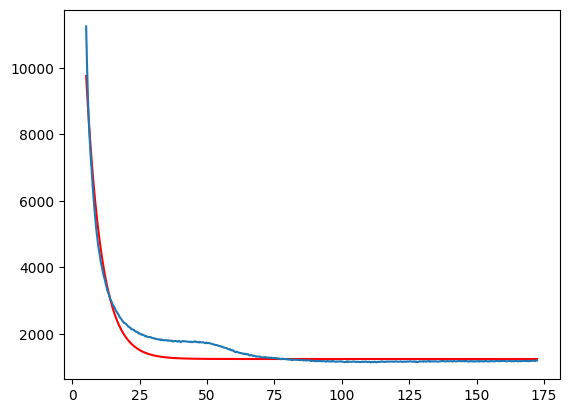

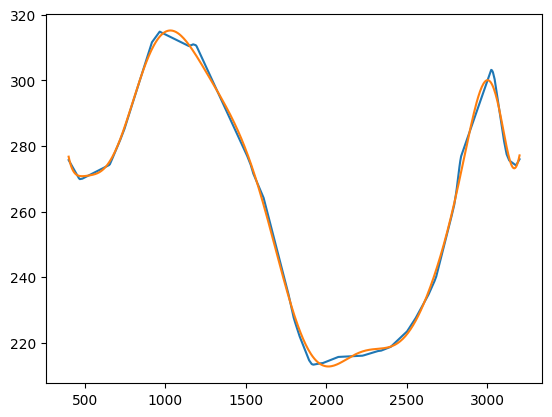

In [19]:
# plt.plot(data[:, 0], data[:, -1])
plt.plot(data[:, 0], data[:, -1] - res)
plt.plot(data[:, 0], func(data[:, 0]))

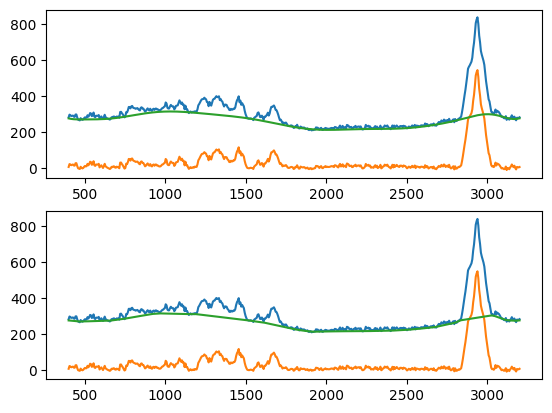

In [24]:
plt.subplot(211)
plt.plot(data[:, 0], data[:, -1])
plt.plot(data[:, 0], data[:, -1] - func(data[:, 0]))
plt.plot(data[:, 0], func(data[:, 0]))
plt.subplot(212)
plt.plot(data[:, 0], data[:, -1])
plt.plot(data[:, 0], res)
plt.plot(data[:, 0], data[:, -1] - res)
